In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("..")
from utils.viztools import *

# Para realizar los tests estadísticos vamos a importar de la librería scipy:
from scipy import stats
from scipy.stats import *

In [2]:
df = pd.read_csv("../data/Metabolic_Syndrome_final_version.csv", index_col=[0])

Vamos a realizar un análisis más profundo alrededor de las variables de ingresos. Para ello, vamos a dividir los ingresos por categorías: bajos, medios y altos.

In [3]:
# Creamos una nueva columna llamada CatIngresos en la que dividimos a los sujetos en 3 categorías: bajos, medios y altos:
bins = [0, 3000, 6000, df.Ingresos.max()]
df["CatIngresos"] = pd.cut(df["Ingresos"], bins = bins, labels = ["Bajos", "Medios", "Altos"])
df.sample()

,Id,Edad,Sexo,EstadoCivil,Ingresos,Etnia,CircunferenciaCintura,IMC,Albuminuria,AcidoUrico,GlucosaSangre,HDL,Trigliceridos,SindromeMetabolico,CatIngresos
2307,71522,63,Mujer,Casado,2000.0,Blanca,109.5,32.8,0,6.9,208,37,231,1,Bajos


c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


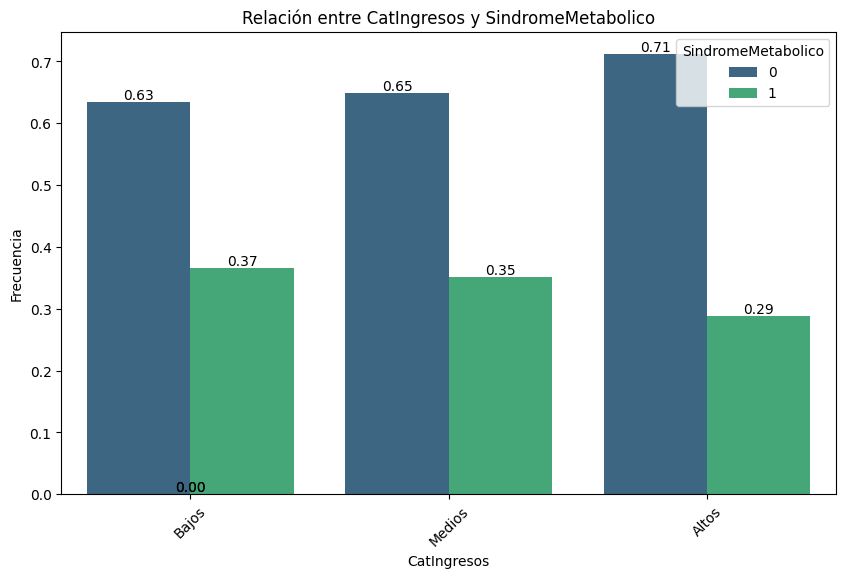

In [4]:
relacion_categoricas(df, "CatIngresos", "SindromeMetabolico", relative_freq = True, show_values = True)

In [5]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["SindromeMetabolico"], df["CatIngresos"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 11.69364526786304
P-Value: 0.0028890642045970995
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[842.48436849 307.37515632 429.1404752 ]
 [437.51563151 159.62484368 222.8595248 ]]


Podemos observar cómo la diferencia principal aparece en el grupo de ingresos altos (más de 6000$/mes). Los grupos de ingresos medios y bajos tienen un mayor porcentaje de positivos en síndrome metabólico.

Vamos a analizar también si hay diferencia en la frecuencia relativa de positivos entre hombres y mujeres:

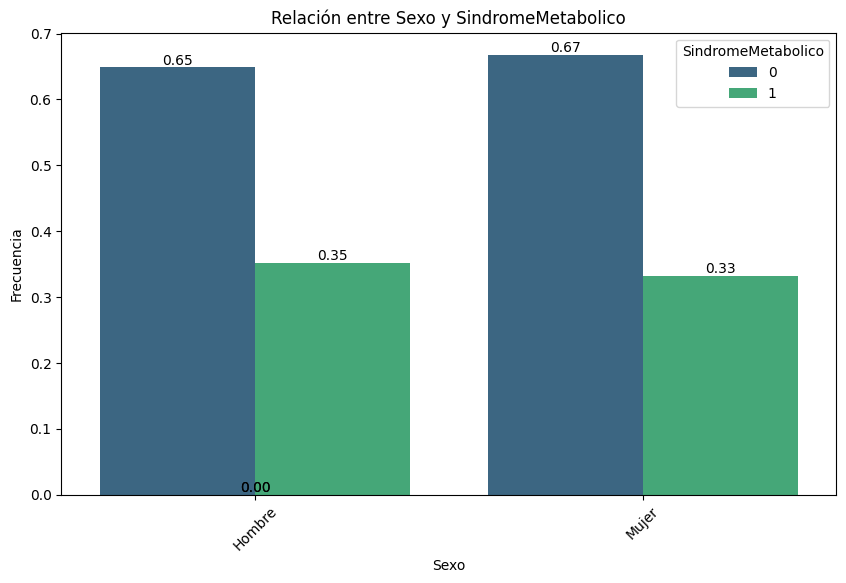

In [6]:
relacion_categoricas(df, "Sexo", "SindromeMetabolico", relative_freq = True, show_values = True)

In [7]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["SindromeMetabolico"], df["Sexo"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.9114061281177257
P-Value: 0.3397416066493117
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[782.58899541 796.41100459]
 [406.41100459 413.58899541]]


No hay una relación entre ser hombre y mujer y tener síndrome metabólico.
Aun así, vamos a seguir profundizando para ver qué más información podemos sacar. Empezamos dividiendo el dataset en dos: hombres y mujeres. Vamos a analizar las categorías de ingresos en relación con el síndrome metabólico según el sexo:

In [8]:
df_hombre = df[df["Sexo"] == "Hombre"]
df_mujer = df[df["Sexo"] == "Mujer"]

CatIngresos - SindromeMetabolico en hombres



c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


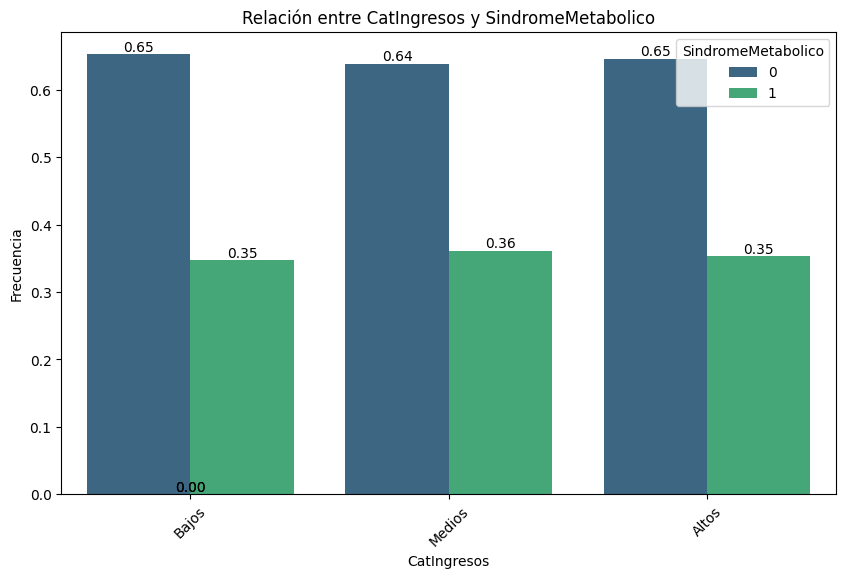

In [9]:
print("CatIngresos - SindromeMetabolico en hombres\n")
relacion_categoricas(df_hombre, "CatIngresos", "SindromeMetabolico", relative_freq = True, show_values = True)

In [10]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df_hombre["SindromeMetabolico"], df_hombre["CatIngresos"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.15435002217236482
P-Value: 0.925727826796188
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[409.16820858 147.19680404 214.63498738]
 [221.83179142  79.80319596 116.36501262]]


Tras realizar el estadístico, confirmamos lo que estamos viendo en la gráfica: en los hombres, los ingresos mensuales no afectan a la hora de ser diagnosticados o no de síndrome metabólico.

CatIngresos - SindromeMetabolico en mujeres



c:\Users\mpuch\Desktop\DS_ONLINE\000_Project_Break_I__EDA\EDA\src\notebooks\..\utils\viztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


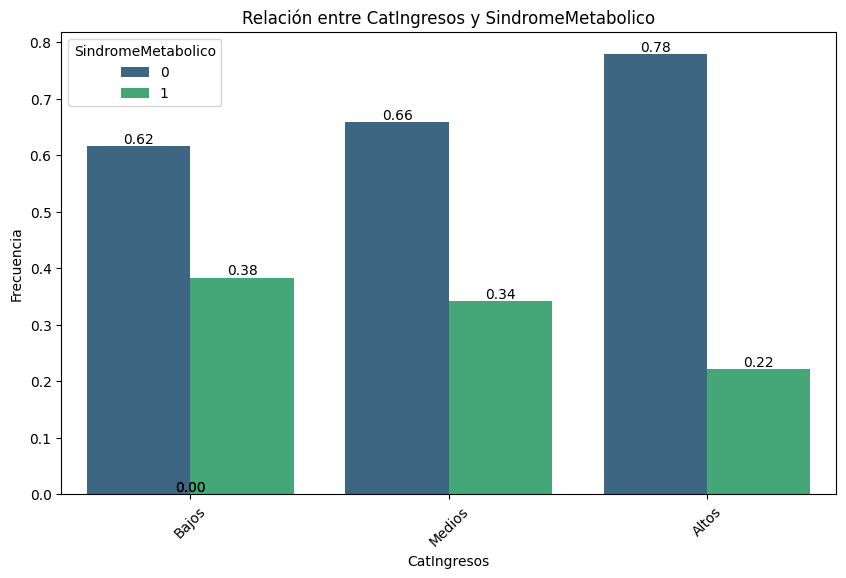

In [11]:
print("CatIngresos - SindromeMetabolico en mujeres\n")
relacion_categoricas(df_mujer, "CatIngresos", "SindromeMetabolico", relative_freq = True, show_values = True)

In [12]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df_mujer["SindromeMetabolico"], df_mujer["CatIngresos"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.678271963162484
P-Value: 2.6548139486038004e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[433.38181818 160.26446281 214.35371901]
 [215.61818182  79.73553719 106.64628099]]


Sin embargo, en el grupo de las mujeres sí, parece que en las mujeres con una categoría de ingresos altos es menos probable que aparezca síndrome metabólico.

**Estado civil**

EstadoCivil - SindromeMetabolico en hombres



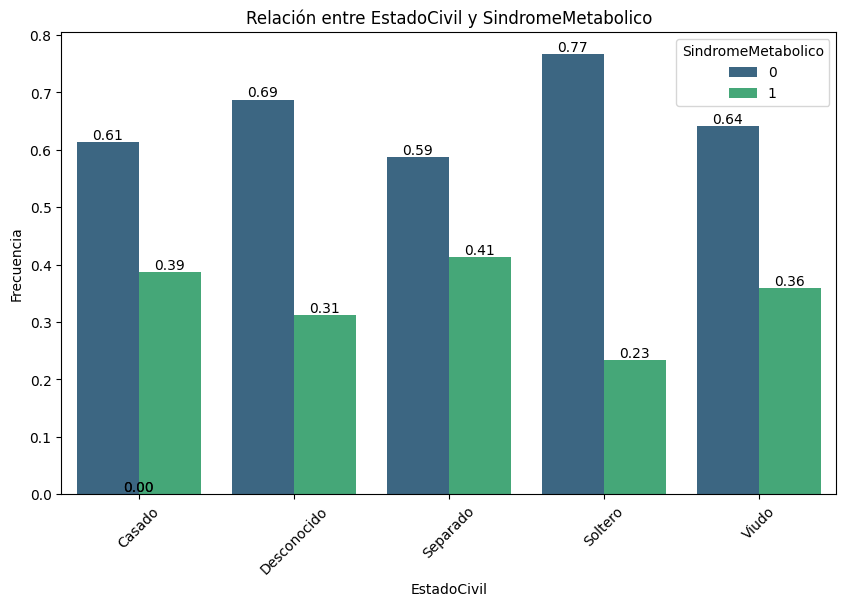

In [13]:
print("EstadoCivil - SindromeMetabolico en hombres\n")
relacion_categoricas(df_hombre, "EstadoCivil", "SindromeMetabolico", relative_freq = True, show_values = True)

In [14]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df_hombre["SindromeMetabolico"], df_hombre["EstadoCivil"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 21.62534545979153
P-Value: 0.00023793814463909447
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[416.94953743  72.62573591 100.50883095 155.62657696  25.28931876]
 [226.05046257  39.37426409  54.49116905  84.37342304  13.71068124]]


EstadoCivil - SindromeMetabolico en mujeres



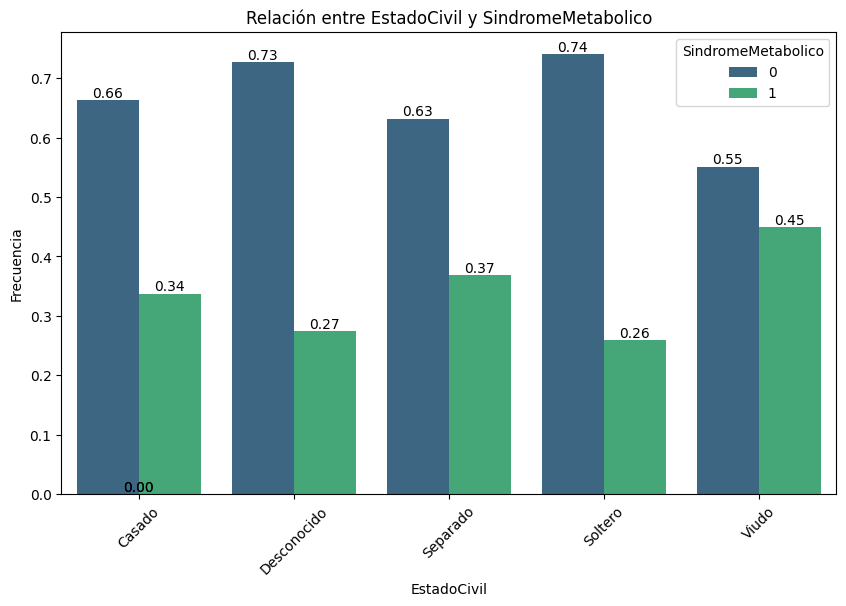

In [15]:
print("EstadoCivil - SindromeMetabolico en mujeres\n")
relacion_categoricas(df_mujer, "EstadoCivil", "SindromeMetabolico", relative_freq = True, show_values = True)

In [16]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df_mujer["SindromeMetabolico"], df_mujer["EstadoCivil"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 16.49682382210083
P-Value: 0.002420066984726578
Grados de Libertad: 4
Tabla de Frecuencias Esperadas:
 [[365.93719008  63.43801653 121.5338843  172.28429752  84.80661157]
 [182.06280992  31.56198347  60.4661157   85.71570248  42.19338843]]


Con respecto al estado civil, tanto en hombres como en mujeres tiene relación con el diagnóstico, pero encontramos diferencias:
- En hombres: los hombres casados, separados y viudos tienen un porcentaje muy parecido.
- En mujeres: las mujeres viudas tienen un mayor porcentaje, seguido de las separadas y casadas.
- En ambos grupos, los solteros tienen un menor porcentaje.

Vamos a indagar en todos los sujetos solteros del dataset.

In [18]:
df_solteros = df[df["EstadoCivil"] == "Soltero"]

(2,)


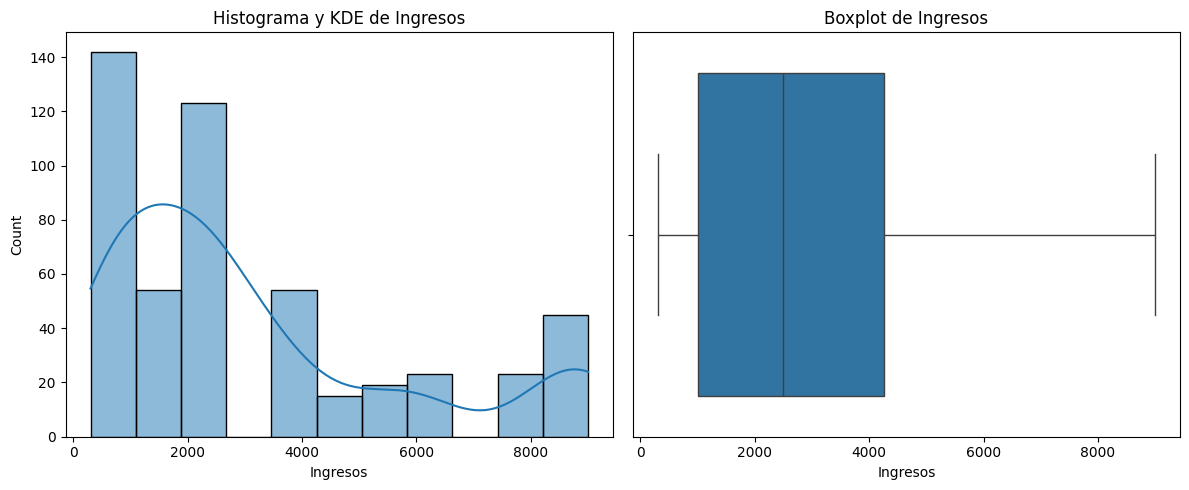

In [19]:
histograma_caja_bigotes(df_solteros, ["Ingresos"])

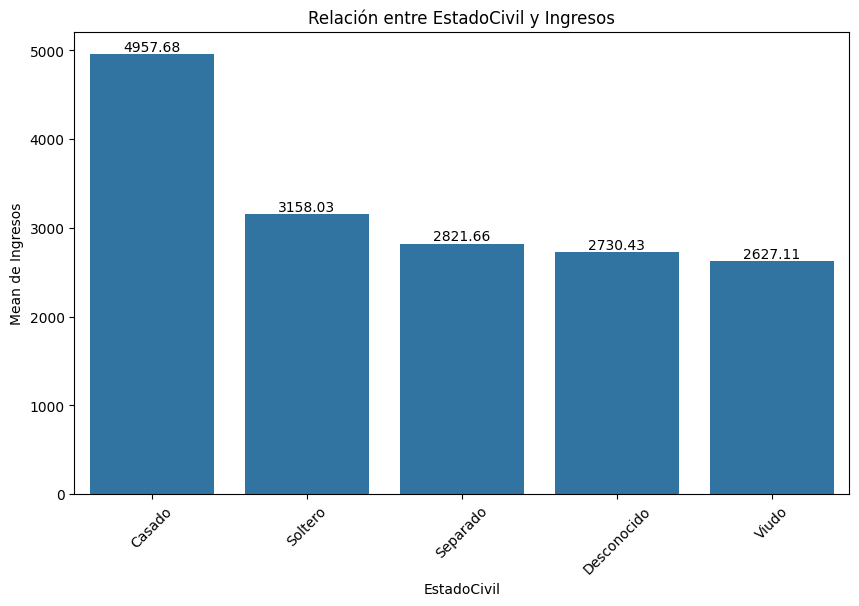

In [30]:
relacion_categorica_numerica(df, "EstadoCivil", "Ingresos", show_values=True, measure='mean')

In [36]:
# Obtenemos el valor de ingresos en una lista agrupándolo por estado civil:
grupos = df["EstadoCivil"].unique()  
estadocivil_ingresos = [df[df["EstadoCivil"] == grupo]["Ingresos"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*estadocivil_ingresos)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 86.67164042808932
P-Value: 7.53298536407806e-69


C:\Users\mpuch\AppData\Local\Temp\ipykernel_22672\2295919332.py:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*estadocivil_ingresos)


Podemos observar cómo el grupo de separados y viudos tienen menores ingresos, podría ser algo a tener en cuenta (sobre todo en mujeres, que afecta más la cantidad de ingresos). Hay relación estadística entre ingresos y estado civil.

**Etnia-Ingresos**

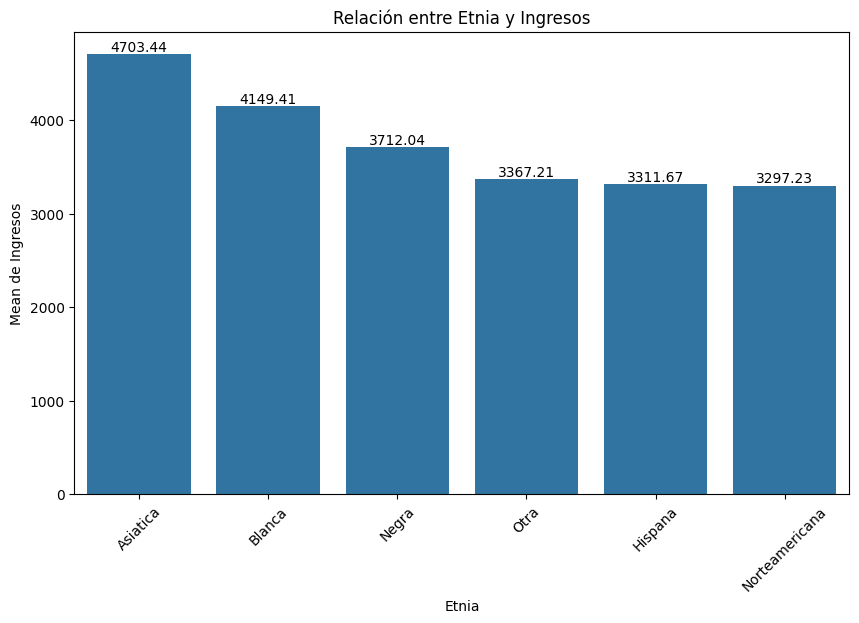

In [31]:
relacion_categorica_numerica(df, "Etnia", "Ingresos", show_values=True, measure='mean')

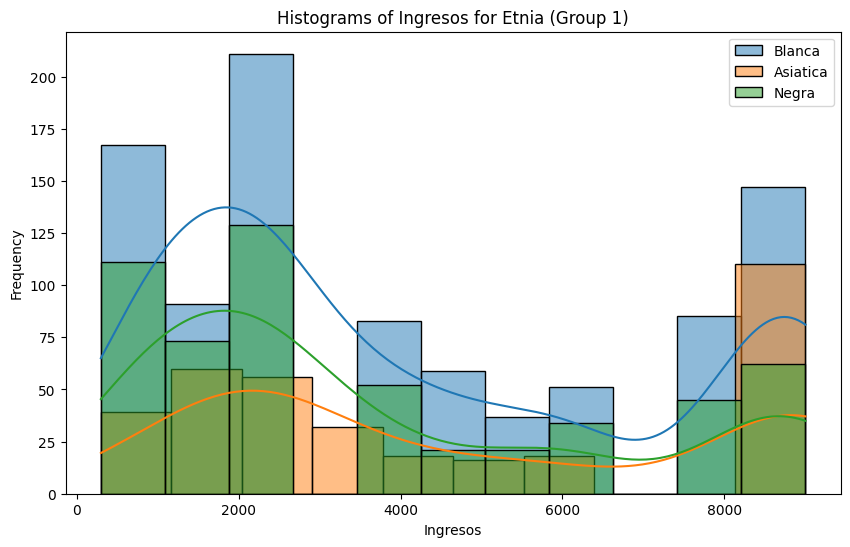

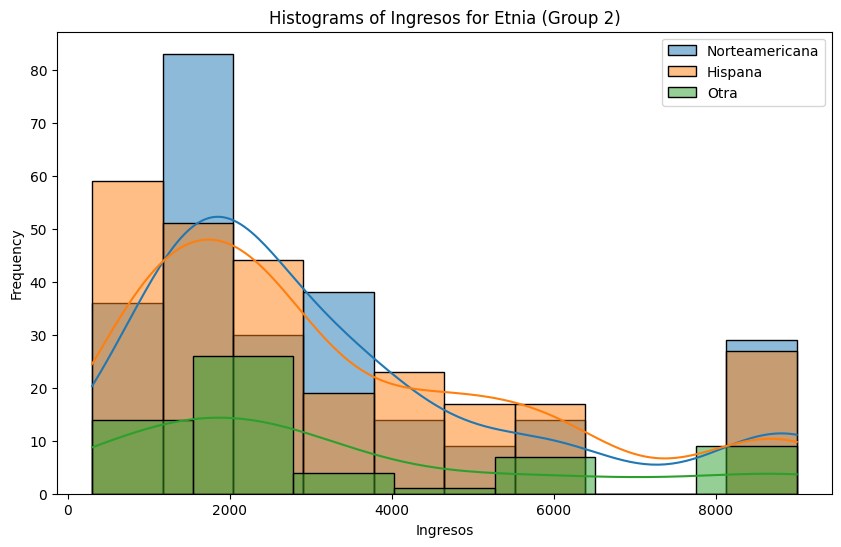

In [38]:
histogramas_agrupados(df, "Etnia", "Ingresos", group_size = 3)

In [40]:
# Obtenemos el valor de ingresos en una lista agrupándolo por etnias:
grupos = df["Etnia"].unique()  
estadocivil_ingresos = [df[df["Etnia"] == grupo]["Ingresos"] for grupo in grupos]

f_val, p_val = stats.f_oneway(*estadocivil_ingresos)
print("F-Value:", f_val)
print("P-Value:", p_val)

F-Value: 12.143879082806604
P-Value: 1.2158376355248016e-11


C:\Users\mpuch\AppData\Local\Temp\ipykernel_22672\1553515130.py:4: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_val, p_val = stats.f_oneway(*estadocivil_ingresos)


También encontramos relación entre etnias e ingresos, observando menos ingresos en la etnia hispana y norteamericana, teniendo ambas un mayor porcentaje de positivos en síndrome metabólico.

**Etnia-EstadoCivil**

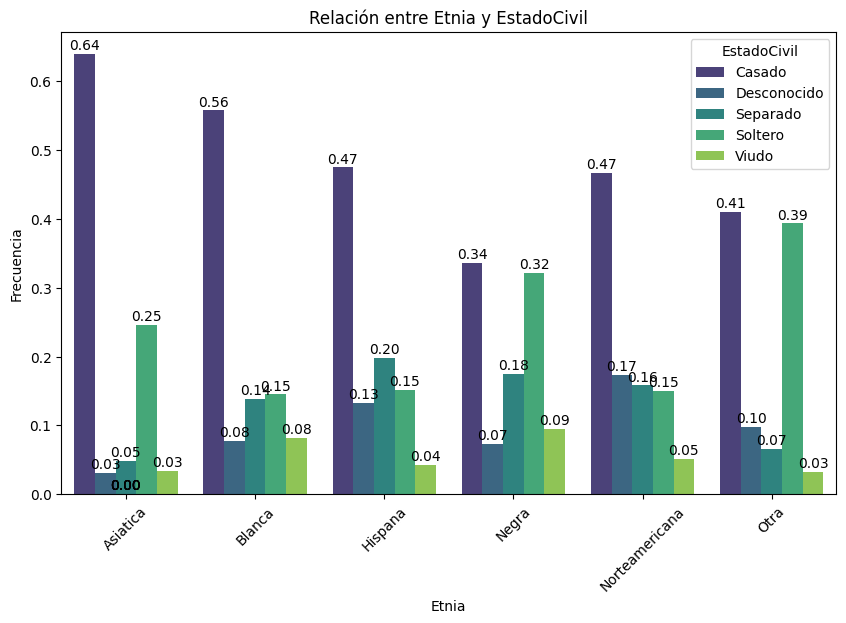

In [43]:
relacion_categoricas(df, "Etnia", "EstadoCivil", relative_freq = True, show_values = True, size_group = 6)

In [44]:
# Creamos una tabla de contingencia:
tabla_contingencia = pd.crosstab(df["Etnia"], df["EstadoCivil"])

# Obtenemos los valores de interés y los mostramos:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 219.733139777218
P-Value: 1.349970677486738e-35
Grados de Libertad: 20
Tabla de Frecuencias Esperadas:
 [[173.2634431   30.11379742  49.0258441   72.44768654  24.14922885]
 [462.20133389  80.33222176 130.78240934 193.26302626  64.42100875]
 [127.58941226  22.17548979  36.10212589  53.34972905  17.78324302]
 [272.05835765  47.28470196  76.9804085  113.75739892  37.91913297]
 [125.60358483  21.83034598  35.54022509  52.51938308  17.50646103]
 [ 30.28386828   5.2634431    8.56898708  12.66277616   4.22092539]]


Existe relación estadística entre la etnia y el estado civil. Destacamos que en la población asiática y negra hay un alto porcentaje de solteros, grupo que tiene un menor porcentaje de síndrome metabólico.

### CONCLUSIONES TRAS PROFUNDIZAR

Relacionando el sexo con los ingresos y el estado civil:
1. El grupo con menor porcentaje de síndrome metabólico es el que tiene la categoría de ingresos alta: > 6000$/mes.
2. El sexo es importante para decidir el peso de los ingresos: las mujeres con ingresos altos tienen menos porcentaje de positivos, mientras que en los hombres los ingresos parecen no ser importantes.
3. Con respecto al estado civil, tanto en hombres como en mujeres tiene relación con el diagnóstico, pero encontramos diferencias:
    - En hombres: los hombres casados, separados y viudos tienen un porcentaje muy parecido.
    - En mujeres: las mujeres viudas tienen un mayor porcentaje, seguido de las separadas y casadas.
    - En ambos grupos, los solteros tienen un menor porcentaje.

    
Relacionando el estado civil con ingresos y etnias:
1. El grupo de separados y viudos tienen menores ingresos, podría ser algo a tener en cuenta (sobre todo en mujeres, que afecta más la cantidad de ingresos). Sin embargo, el de solteros no tiene los mayores ingresos.
2. Observamos menos ingresos en la etnia hispana y norteamericana, teniendo ambas un mayor porcentaje de positivos en síndrome metabólico.
3. Destacamos que en la población asiática y negra hay un alto porcentaje de solteros, grupo que tiene un menor porcentaje de síndrome metabólico.